In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

--- Using the Breast Cancer Wisconsin Dataset ---
Dataset shape: (569, 30)
--- Training a Single Decision Tree ---

--- Training a Random Forest Classifier ---

--- Model Performance Comparison ---

Metrics for Single Decision Tree:
  Accuracy:  0.9415
  Precision: 0.9712
  Recall:    0.9352
  F1-Score:  0.9528

Metrics for Random Forest (100 estimators):
  Accuracy:  0.9708
  Precision: 0.9640
  Recall:    0.9907
  F1-Score:  0.9772

--- Exploring the effect of n_estimators ---
Number of Estimators vs. Accuracy:
  1 estimators: Accuracy = 0.9474
  5 estimators: Accuracy = 0.9649
  10 estimators: Accuracy = 0.9649
  20 estimators: Accuracy = 0.9708
  50 estimators: Accuracy = 0.9708
  75 estimators: Accuracy = 0.9708
  100 estimators: Accuracy = 0.9708
  150 estimators: Accuracy = 0.9708
  200 estimators: Accuracy = 0.9708


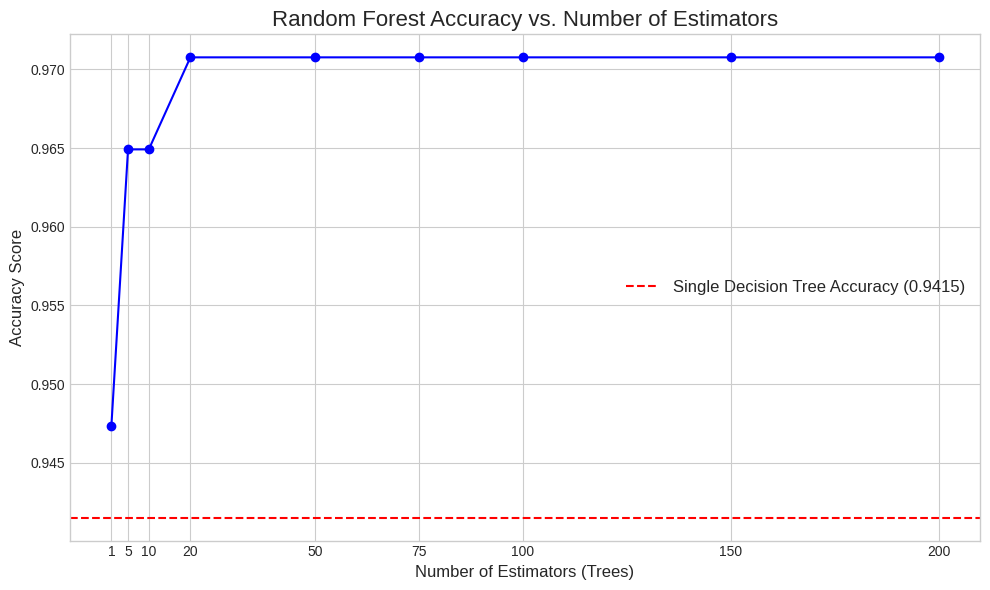


--- Script finished. Check the plot for visualization. ---


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# --- 1. Load the Breast Cancer dataset ---
from sklearn.datasets import load_breast_cancer

# Load the dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

print("--- Using the Breast Cancer Wisconsin Dataset ---")
print(f"Dataset shape: {X.shape}") # (569 samples, 30 features)lit the dataset into training and testing sets
# 70% for training, 30% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


# --- 2. Train a Single Decision Tree Classifier ---
print("--- Training a Single Decision Tree ---")
# Initialize the Decision Tree classifier
# random_state is set for consistent results
single_tree = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
single_tree.fit(X_train, y_train)

# Make predictions on the test data
y_pred_tree = single_tree.predict(X_test)


# --- 3. Train a Random Forest Classifier ---
print("\n--- Training a Random Forest Classifier ---")
# Initialize the Random Forest with 100 estimators (trees)
# random_state is set for reproducibility
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
random_forest.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = random_forest.predict(X_test)


# --- 4. Compare Performance Metrics ---
def evaluate_model(y_true, y_pred, model_name):
    """Calculates and prints evaluation metrics for a model."""
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    print(f"\nMetrics for {model_name}:")
    print(f"  Accuracy:  {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-Score:  {f1:.4f}")

print("\n--- Model Performance Comparison ---")
evaluate_model(y_test, y_pred_tree, "Single Decision Tree")
evaluate_model(y_test, y_pred_rf, "Random Forest (100 estimators)")


# --- 5. Explore the effect of the number of estimators in Random Forest ---
print("\n--- Exploring the effect of n_estimators ---")

# We'll test a range of estimator numbers
estimator_range = [1, 5, 10, 20, 50, 75, 100, 150, 200]
rf_accuracies = []

print("Number of Estimators vs. Accuracy:")
for n_estimators in estimator_range:
    # Initialize and train the Random Forest model
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_classifier.fit(X_train, y_train)
    
    # Make predictions and calculate accuracy
    y_pred = rf_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    rf_accuracies.append(accuracy)
    print(f"  {n_estimators} estimators: Accuracy = {accuracy:.4f}")

# --- 6. Visualize the results ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(estimator_range, rf_accuracies, marker='o', linestyle='-', color='b')
ax.set_title('Random Forest Accuracy vs. Number of Estimators', fontsize=16)
ax.set_xlabel('Number of Estimators (Trees)', fontsize=12)
ax.set_ylabel('Accuracy Score', fontsize=12)
ax.set_xticks(estimator_range)
ax.grid(True)

# Annotate the point for the single decision tree for comparison
tree_accuracy = accuracy_score(y_test, y_pred_tree)
ax.axhline(y=tree_accuracy, color='r', linestyle='--', label=f'Single Decision Tree Accuracy ({tree_accuracy:.4f})')
ax.legend(fontsize=12)

plt.tight_layout()
plt.show()

print("\n--- Script finished. Check the plot for visualization. ---")


In [2]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from scipy.stats import mode

# --- 1. Load and Prepare the Dataset ---
print("--- Loading Breast Cancer Dataset ---")
# Load the dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# Split the data into training and testing sets
# 70% for training, 30% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


# --- 2. Initialize and Train Base Classifiers ---
print("\n--- Training Individual Base Classifiers ---")
# We will use three different models to create our ensemble
model1 = LogisticRegression(max_iter=10000, random_state=42)
model2 = DecisionTreeClassifier(random_state=42)
# We must set probability=True for SVC to use soft voting (averaging probabilities)
model3 = SVC(probability=True, random_state=42)

# Train each model on the training data
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)


# --- 3. Evaluate Individual Models ---
print("\n--- Evaluating Individual Model Performance ---")
# Make predictions on the test set
pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)

# Calculate accuracy for each model
acc1 = accuracy_score(y_test, pred1)
acc2 = accuracy_score(y_test, pred2)
acc3 = accuracy_score(y_test, pred3)

individual_accuracies = [acc1, acc2, acc3]
print(f"Logistic Regression Accuracy: {acc1:.4f}")
print(f"Decision Tree Accuracy:     {acc2:.4f}")
print(f"Support Vector Classifier Accuracy: {acc3:.4f}")


# --- 4. Implement and Evaluate Ensemble Techniques ---

# --- 4a. Max Voting (Hard Voting) ---
print("\n--- 1. Applying Max Voting (Hard Voting) ---")
# Stack the predictions horizontally
stacked_predictions = np.column_stack((pred1, pred2, pred3))

# For each sample, the final prediction is the mode (most frequent class)
# The result from mode is a tuple (mode_array, count_array), so we take the first element
max_voting_pred = mode(stacked_predictions, axis=1)[0]

# Evaluate the accuracy of the Max Voting ensemble
acc_max_voting = accuracy_score(y_test, max_voting_pred)
print(f"Max Voting Ensemble Accuracy: {acc_max_voting:.4f}")


# --- 4b. Averaging (Soft Voting) ---
print("\n--- 2. Applying Averaging (Soft Voting) ---")
# Get the probability predictions from each model
# Each will be an array of shape (n_samples, n_classes)
prob1 = model1.predict_proba(X_test)
prob2 = model2.predict_proba(X_test)
prob3 = model3.predict_proba(X_test)

# Average the probabilities across all models
average_prob = (prob1 + prob2 + prob3) / 3

# The final prediction is the class with the highest average probability
# np.argmax returns the index of the maximum value along an axis
averaging_pred = np.argmax(average_prob, axis=1)

# Evaluate the accuracy of the Averaging ensemble
acc_averaging = accuracy_score(y_test, averaging_pred)
print(f"Averaging Ensemble Accuracy: {acc_averaging:.4f}")


# --- 4c. Weighted Averaging (Weighted Soft Voting) ---
print("\n--- 3. Applying Weighted Averaging ---")
# We use the individual model accuracies as weights
# Note: In a real-world scenario, it's better to determine weights from a
# separate validation set to avoid data leakage from the test set.
# Here, we use test accuracies for a clear demonstration.
weights = individual_accuracies

# Calculate the weighted average of probabilities
weighted_average_prob = (weights[0] * prob1 + weights[1] * prob2 + weights[2] * prob3) / np.sum(weights)

# The final prediction is the class with the highest weighted average probability
weighted_averaging_pred = np.argmax(weighted_average_prob, axis=1)

# Evaluate the accuracy of the Weighted Averaging ensemble
acc_weighted_averaging = accuracy_score(y_test, weighted_averaging_pred)
print(f"Weighted Averaging Ensemble Accuracy: {acc_weighted_averaging:.4f}")


# --- 5. Final Comparison ---
print("\n\n--- Final Results Summary ---")
print(f"Logistic Regression      | Accuracy: {acc1:.4f}")
print(f"Decision Tree            | Accuracy: {acc2:.4f}")
print(f"Support Vector Machine   | Accuracy: {acc3:.4f}")
print("-----------------------------------------")
print(f"Max Voting Ensemble      | Accuracy: {acc_max_voting:.4f}")
print(f"Averaging Ensemble       | Accuracy: {acc_averaging:.4f}")
print(f"Weighted Avg. Ensemble   | Accuracy: {acc_weighted_averaging:.4f}")


best_individual_acc = max(individual_accuracies)
best_ensemble_acc = max(acc_max_voting, acc_averaging, acc_weighted_averaging)

if best_ensemble_acc > best_individual_acc:
    print("\nObservation: The best ensemble model performed better than the best individual model.")
else:
    print("\nObservation: An individual model performed as well as or better than the ensemble methods.")


--- Loading Breast Cancer Dataset ---
Training set size: 398 samples
Test set size: 171 samples

--- Training Individual Base Classifiers ---

--- Evaluating Individual Model Performance ---
Logistic Regression Accuracy: 0.9474
Decision Tree Accuracy:     0.9181
Support Vector Classifier Accuracy: 0.9064

--- 1. Applying Max Voting (Hard Voting) ---
Max Voting Ensemble Accuracy: 0.9474

--- 2. Applying Averaging (Soft Voting) ---
Averaging Ensemble Accuracy: 0.9474

--- 3. Applying Weighted Averaging ---
Weighted Averaging Ensemble Accuracy: 0.9474


--- Final Results Summary ---
Logistic Regression      | Accuracy: 0.9474
Decision Tree            | Accuracy: 0.9181
Support Vector Machine   | Accuracy: 0.9064
-----------------------------------------
Max Voting Ensemble      | Accuracy: 0.9474
Averaging Ensemble       | Accuracy: 0.9474
Weighted Avg. Ensemble   | Accuracy: 0.9474

Observation: An individual model performed as well as or better than the ensemble methods.


In [ ]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# --- 1. Load and Prepare the Dataset ---
print("--- Loading and Preparing the Breast Cancer Dataset ---")
# Load the dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# Split data into training and testing sets
# 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale the features. This is important for Logistic Regression and KNN.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples\n")


# --- 2. Initialize and Evaluate Individual Base Learners ---
print("--- Training and Evaluating Individual Classifiers ---")
# We will use three different models as our base learners
clf1 = LogisticRegression(random_state=42)
clf2 = DecisionTreeClassifier(random_state=42)
clf3 = KNeighborsClassifier(n_neighbors=5)

# Train and evaluate each model individually to get a baseline
individual_accuracies = {}
for clf, label in zip([clf1, clf2, clf3], ['Logistic Regression', 'Decision Tree', 'KNN']):
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    individual_accuracies[label] = accuracy
    print(f"Accuracy of {label}: {accuracy:.4f}")


# --- 3. Create and Evaluate the Hard Voting Ensemble ---
print("\n--- 1. Creating and Evaluating the Hard Voting Ensemble ---")
# The VotingClassifier takes a list of (name, model) tuples
estimators = [
    ('lr', clf1),
    ('dt', clf2),
    ('knn', clf3)
]

# Create the Hard Voting classifier
# voting='hard' means it uses the majority rule on the predicted class labels
hard_voting_clf = VotingClassifier(estimators=estimators, voting='hard')

# Train the ensemble
hard_voting_clf.fit(X_train_scaled, y_train)

# Make predictions and evaluate
hard_pred = hard_voting_clf.predict(X_test_scaled)
hard_accuracy = accuracy_score(y_test, hard_pred)
print(f"Accuracy of Hard Voting Classifier: {hard_accuracy:.4f}")


# --- 4. Create and Evaluate the Soft Voting Ensemble ---
print("\n--- 2. Creating and Evaluating the Soft Voting Ensemble ---")
# Create the Soft Voting classifier
# voting='soft' means it averages the predicted probabilities from each model
# Note: This requires that base learners can provide probability estimates.
soft_voting_clf = VotingClassifier(estimators=estimators, voting='soft')

# Train the ensemble
soft_voting_clf.fit(X_train_scaled, y_train)

# Make predictions and evaluate
soft_pred = soft_voting_clf.predict(X_test_scaled)
soft_accuracy = accuracy_score(y_test, soft_pred)
print(f"Accuracy of Soft Voting Classifier: {soft_accuracy:.4f}")


# --- 5. Final Comparison ---
print("\n\n--- Final Results Summary ---")
print("-----------------------------------------")
for label, acc in individual_accuracies.items():
    print(f"{label:<25} | Accuracy: {acc:.4f}")
print("-----------------------------------------")
print(f"{'Hard Voting Ensemble':<25} | Accuracy: {hard_accuracy:.4f}")
print(f"{'Soft Voting Ensemble':<25} | Accuracy: {soft_accuracy:.4f}")
print("-----------------------------------------")

if soft_accuracy > hard_accuracy:
    print("\nObservation: Soft Voting performed better than Hard Voting.")
    print("This is often because it uses more information (the confidence of each model) to make its final decision.")
else:
    print("\nObservation: Hard Voting performed as well as or better than Soft Voting in this case.")
